In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [ ]:

"""
questions.csv: metadata for the questions posed to users.

question_id: foreign key for the train/test content_id column, when the content type is question (0).

bundle_id: code for which questions are served together.

correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.

part: the relevant section of the TOEIC test.

tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

"""

In [148]:
questions = pd.read_csv("D:/Project_dataset/Pr_riid/questions.csv")

In [149]:
questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [ ]:
#question_id : 각각의 문제 번호(train/test에 있는 content_id의 외래키)
#bundle_id :  문제 묶음
#tags : 이문제와 비슷한 유형의 문제
#part : 단원


In [150]:
questions[questions.question_id == 5692]


,question_id,bundle_id,correct_answer,part,tags
5692,5692,5692,3,5,151


In [152]:
questions[questions.bundle_id==11684]


,question_id,bundle_id,correct_answer,part,tags
11684,11684,11684,2,7,145 160 35 0 122
11685,11685,11684,3,7,145 160 35 0 122
11686,11686,11684,2,7,76 160 35 0 122
11687,11687,11684,0,7,160 35 0 122 165
11688,11688,11684,1,7,160 35 0 122 165


In [154]:
questions.correct_answer.value_counts()

0    3716
3    3544
1    3478
2    2785
Name: correct_answer, dtype: int64

In [155]:
questions.part.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [157]:
questions.part.value_counts()

5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: part, dtype: int64

8                     738
73                    617
53                    523
1                     413
96                    373
                     ... 
74 81 29                1
143 141 162 92 102      1
161 103 162 29          1
62 138 41 38 29         1
143 30 69 38 92         1
Name: tags, Length: 1519, dtype: int64

---

In [135]:
questions.head()
questions.shape

(13523, 5)

In [136]:
questions[questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [137]:
train.query('content_id == "10033" and answered_correctly != -1')
#조건에 부합하는 데이터를 출력할때 사용(비교연산자, in연산자, 논리연산자, 외부 변수(또는 함수)참조 연산, 인덱스 검색, 문자열 부분검색)


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation


In [138]:
questions['tags'] = questions['tags'].astype(str)
tags = [i.split() for i in questions[questions.tags != 'nan'].tags.values]
#print(tags)
tags = [item for elem in tags for item in elem]
#print(tags)
tags = set(tags)
#print(tags)
tags = list(tags)
#print(tags)
len(tags)

188

In [139]:
tags_list = [x.split() for x in questions.tags.values]
questions['tags'] = tags_list
questions.head()

correct = train[train.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
questions = questions.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,"[51, 131, 162, 38]",0.0,1.0
1,1,1,1,1,"[131, 36, 81]",0.0,1.0
2,2,2,0,1,"[131, 101, 162, 92]",2.0,1.0
3,3,3,0,1,"[131, 149, 162, 29]",1.0,1.0
4,4,4,3,1,"[131, 5, 162, 38]",2.0,0.0


In [93]:
questions.tags.values

array([list(['51', '131', '162', '38']), list(['131', '36', '81']),
       list(['131', '101', '162', '92']), ..., list(['73']),
       list(['125']), list(['55'])], dtype=object)

In [94]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = questions[questions.tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")

tags_df.head()

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
24,12,4,16,17,0.250000
19,10,4,14,57,0.285714
11,7,3,10,15,0.300000
124,10,5,15,12,0.333333
46,10,5,15,10,0.333333


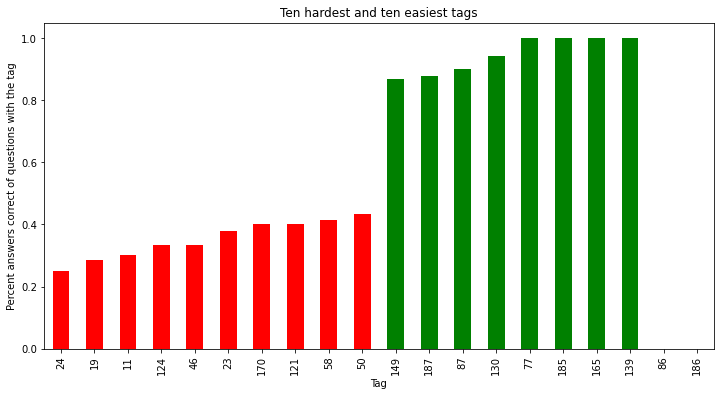

In [95]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("Ten hardest and ten easiest tags")
plt.xlabel("Tag")
plt.ylabel("Percent answers correct of questions with the tag")
plt.xticks(rotation=90)
plt.show()

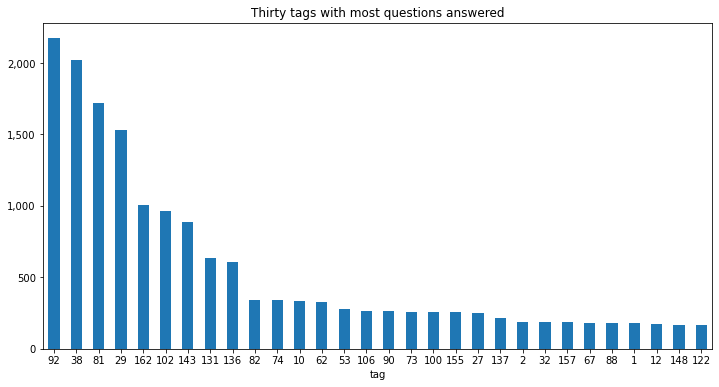

In [105]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Thirty tags with most questions answered")
plt.xticks(rotation=0) #90이 디폴트
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

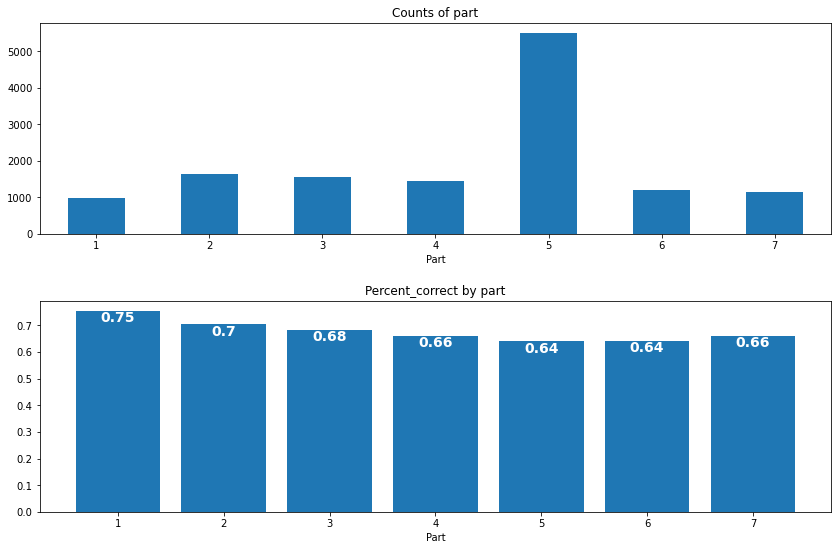

In [104]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1 = questions.groupby("part").count()['question_id'].plot.bar()
plt.title("Counts of part")
plt.xlabel("Part")
plt.xticks(rotation=0)

part = questions.groupby('part').agg({'Wrong': ['sum'], 'Right': ['sum']})
part['Percent_correct'] = part.Right/(part.Right + part.Wrong)
part = part.iloc[:,2]


ax2 = fig.add_subplot(212)
plt.bar(part.index, part.values)
for i, v in zip(part.index, part.values):
    plt.text(i, v, round(v,2), color='white', fontweight='bold', fontsize=14, va='top', ha='center')

plt.title("Percent_correct by part")
plt.xlabel("Part")
plt.xticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()